*Copyright (c) 2023 Graphcore Ltd. All rights reserved.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, gamma, gammainc

## Evaluation of the auxiliary gamma function

The evaluation of integrals involving a $\frac{1}{r}$ term require computing the following:

$$
F_\nu(t) = \int_0^1 u^{2 \nu} e^{-t u^2} du
$$

Taketa et al. call this the auxiliary function $F_\nu$ and we can show its relationship to the $\gamma$ function with SymPy.
First we build up the integral as stated in equation 2.11 in the THO paper.

In [2]:
from sympy import *

u, t = symbols("u t", real=True)
nu = Symbol("nu", integer=True, nonnegative=True)
F_nu = Integral(u ** (2 * nu) * exp(-t * u **2), (u, 0, 1))
F_nu

Integral(u**(2*nu)*exp(-t*u**2), (u, 0, 1))

Evaluating the integral results in an expression involving the [lower incomplete Gamma function](https://mathworld.wolfram.com/IncompleteGammaFunction.html)

In [3]:
gammanu = simplify(F_nu.doit())
gammanu

t**(-nu - 1/2)*lowergamma(nu + 1/2, t)/2

In [4]:
gammanu

t**(-nu - 1/2)*lowergamma(nu + 1/2, t)/2

In [9]:
help(lambdify((nu, t), gammanu, modules="scipy"))

Help on function _lambdifygenerated:

_lambdifygenerated(nu, t)
    Created with lambdify. Signature:
    
    func(nu, t)
    
    Expression:
    
    t**(-nu - 1/2)*lowergamma(nu + 1/2, t)/2
    
    Source code:
    
    def _lambdifygenerated(nu, t):
        return (1/2)*t**(-nu - 1/2)*gamma(nu + 1/2)*gammainc(nu + 1/2, t)
    
    
    Imported modules:



In [10]:
F_0 = simplify(gammanu.subs(nu, 0))
F_0

sqrt(pi)*erf(sqrt(t))/(2*sqrt(t))

<StemContainer object of 3 artists>

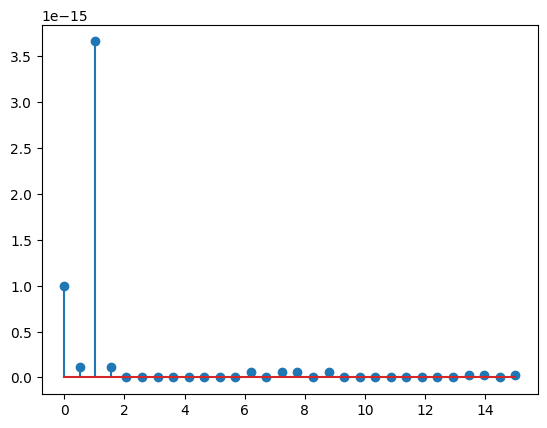

In [64]:
def f_0(t):
    epsilon = 1e-6
    t = np.maximum(t, epsilon)
    return erf(np.sqrt(t)) * np.sqrt(np.pi / (4 * t))

def gamma_nu(nu, t):
    epsilon = 1e-6
    t = np.maximum(t, epsilon)
    return (1/2)*t**(-nu - 1/2)*gamma(nu + 1/2)*gammainc(nu + 1/2, t)
    

x = np.linspace(0, 15, 30)
y1 = f_0(x)
y2 = gamma_nu(0, x)
plt.stem(x, np.abs(y1-y2))
# plt.plot(x, y1, x, y2)


In [29]:

f_0 = simplify(gammanu.subs(nu, 0))
f0 = symbols("f_0")
for i in range(4):
    display(simplify(gammanu.subs(nu, i)).replace(f_0, f0))

f_0

-exp(-t)/(2*t) + sqrt(pi)*erf(sqrt(t))/(4*t**(3/2))

-exp(-t)/(2*t) - 3*exp(-t)/(4*t**2) + 3*sqrt(pi)*erf(sqrt(t))/(8*t**(5/2))

(-8*t**(5/2) - 20*t**(3/2) - 30*sqrt(t) + 15*sqrt(pi)*exp(t)*erf(sqrt(t)))*exp(-t)/(16*t**(7/2))

In [25]:
f_0, f

(sqrt(pi)*erf(sqrt(t))/(2*sqrt(t)), f)